<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Lab 2: Data wrangling


Estimated time needed: **60** minutes


In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   Exploratory Data Analysis
*   Determine Training Labels


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries.


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

### Data Analysis


Load Space X dataset, from last section.


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute


In [3]:
# df.to_excel('E:/professional_courses/applied_datascience_capstone/week1/note_books/dataset_part_1.xlsx', index = False)

In [4]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

Identify which columns are numerical and categorical:


In [5]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

###  Calculating the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>


Next, let's see the number of launches for each site.

Use the method  <code>value_counts()</code> on the column <code>LaunchSite</code> to determine the number of launches  on each site:


In [6]:
# Apply value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types:


*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[11] </a>

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


### TASK 2: Calculate the number and occurrence of each orbit


Use the method  <code>.value_counts()</code> to determine the number and occurrence of each orbit in the  column <code>Orbit</code>


In [7]:
# Apply value_counts on Orbit column
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
GEO       1
HEO       1
SO        1
Name: Orbit, dtype: int64

### TASK 3: Calculate the number and occurence of mission outcome per orbit type


Use the method <code>.value_counts()</code> on the column <code>Outcome</code> to determine the number of <code>landing_outcomes</code>.Then assign it to a variable landing_outcomes.


In [8]:
# landing_outcomes = values on Outcome column
landing_outcome = df['Outcome'].value_counts()
landing_outcome

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [9]:
for i,outcome in enumerate(landing_outcome.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 None ASDS
6 False Ocean
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:


In [10]:
bad_outcomes=set(landing_outcome.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [11]:
bad_list = list(bad_outcomes)
bad_list

['None ASDS', 'False RTLS', 'False Ocean', 'False ASDS', 'None None']

### TASK 4: Create a landing outcome label from Outcome column


Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


In [12]:
df[['Outcome']].head(10)

,Outcome
0,None None
1,None None
2,None None
3,False Ocean
4,None None
5,None None
6,True Ocean
7,True Ocean
8,None None
9,None None


In [13]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

landing_class = []
zero = 0
one = 1

for i in df['Outcome'].values:
    if i in  bad_list:
        landing_class.append(zero)
        
    else:
        landing_class.append(one)

In [14]:
np.array(landing_class)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [15]:
np.array(landing_class).shape

(90,)

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully


In [16]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [57]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


We can use the following line of code to determine  the success rate:


In [18]:
df["Class"].mean()

0.6666666666666666

In [19]:
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [20]:
print('67%', 'is the success rate') 

67% is the success rate


In [21]:
# df.to_csv("dataset_part_2.csv", index=False)

In [22]:
# df.to_excel('E:/professional_courses/applied_datascience_capstone/week1/note_books/dataset_part_2.xlsx', index = False)

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>df.to_csv("dataset_part\_2.csv", index=False)</code>


# Exploratory Analysis Using Pandas and Matplotlib

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


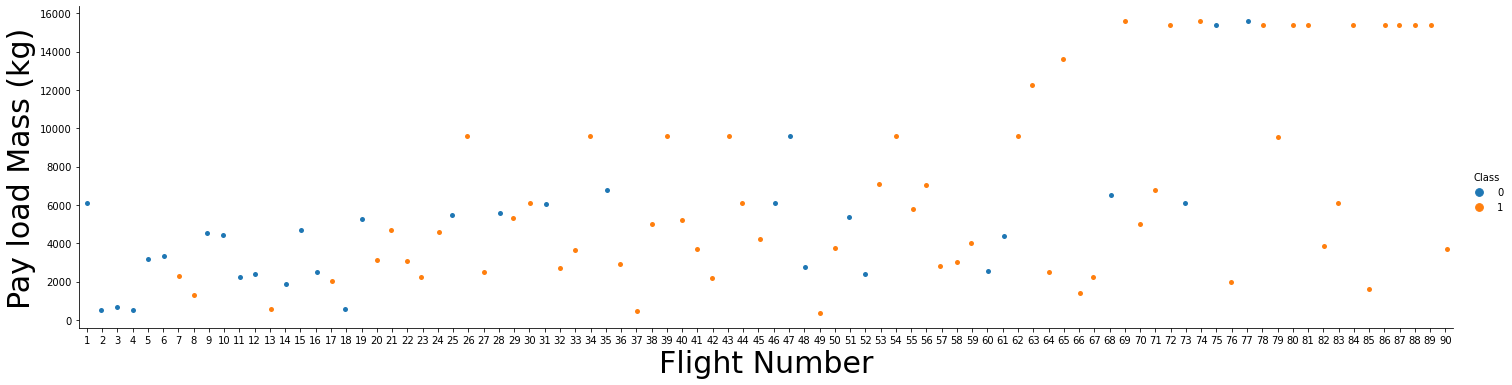

In [23]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=30)
plt.ylabel("Pay load Mass (kg)",fontsize=30)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


In [24]:
# Apply value_counts() on column LaunchSite
df[['LaunchSite','Class']].value_counts()

LaunchSite    Class
CCAFS SLC 40  1        33
              0        22
KSC LC 39A    1        17
VAFB SLC 4E   1        10
KSC LC 39A    0         5
VAFB SLC 4E   0         3
dtype: int64

In [25]:
df['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [26]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

### Sucess Rates of Launch Sites

In [27]:
launch_sites = df[['LaunchSite','Class']].value_counts()

In [28]:
launch_sites / 90 * 100

LaunchSite    Class
CCAFS SLC 40  1        36.666667
              0        24.444444
KSC LC 39A    1        18.888889
VAFB SLC 4E   1        11.111111
KSC LC 39A    0         5.555556
VAFB SLC 4E   0         3.333333
dtype: float64

## Visualizing the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


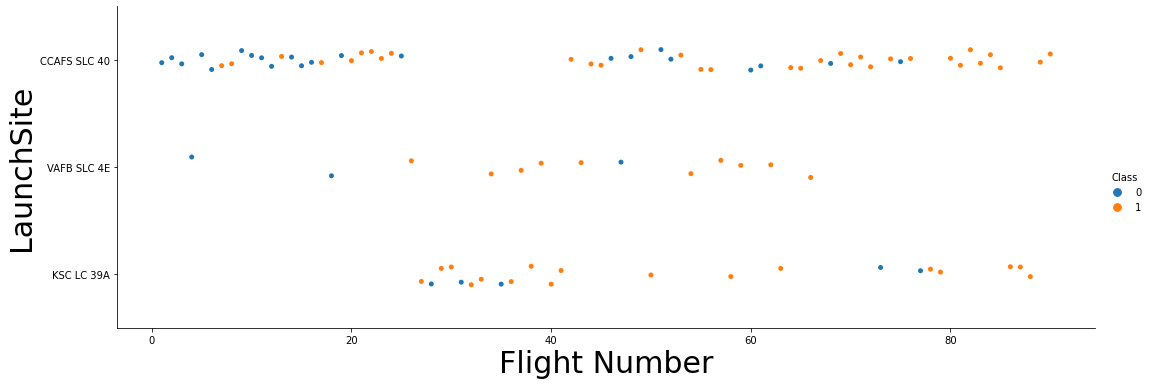

In [29]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=30)
plt.ylabel("LaunchSite",fontsize=30)
plt.show()

## Visualize the relationship between Payload and Launch Site

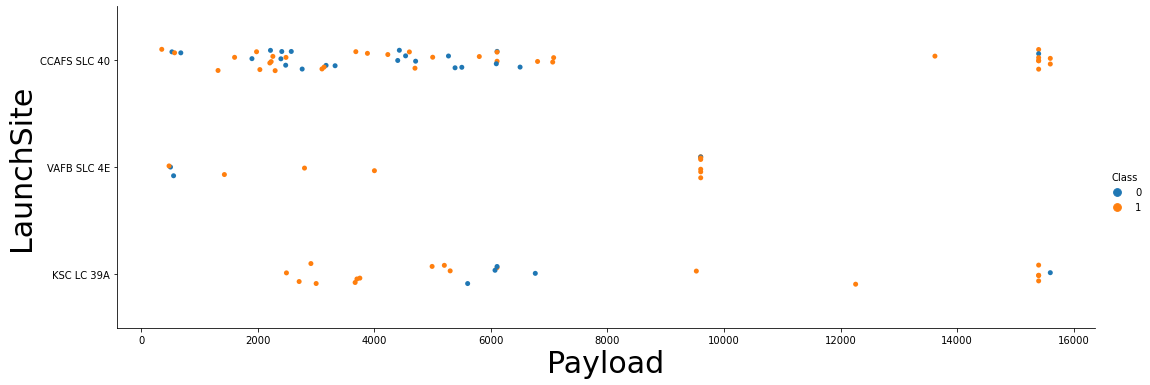

In [30]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Payload",fontsize=30)
plt.ylabel("LaunchSite",fontsize=30)
plt.show()

## Visualize the relationship between success rate of each orbit type

In [31]:
df[['Orbit','Class']].value_counts().sort_index(ascending=True)

Orbit  Class
ES-L1  1         1
GEO    1         1
GTO    0        13
       1        14
HEO    1         1
ISS    0         8
       1        13
LEO    0         2
       1         5
MEO    0         1
       1         2
PO     0         3
       1         6
SO     0         1
SSO    1         5
VLEO   0         2
       1        12
dtype: int64

In [32]:
y = df[['Orbit','Class']].value_counts().sort_index(ascending=True)
y = y / 90 * 100
y

Orbit  Class
ES-L1  1         1.111111
GEO    1         1.111111
GTO    0        14.444444
       1        15.555556
HEO    1         1.111111
ISS    0         8.888889
       1        14.444444
LEO    0         2.222222
       1         5.555556
MEO    0         1.111111
       1         2.222222
PO     0         3.333333
       1         6.666667
SO     0         1.111111
SSO    1         5.555556
VLEO   0         2.222222
       1        13.333333
dtype: float64

In [33]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [34]:
df['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [35]:
#use groupby method on Orbit column and get the mean of Class column
# df_orbit = df.groupby(['Orbit']).aggregate(lambda x: ','.join(map(str, x)))
# df_orbit.head(5)

In [36]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Text(0, 0.5, 'Ratings')

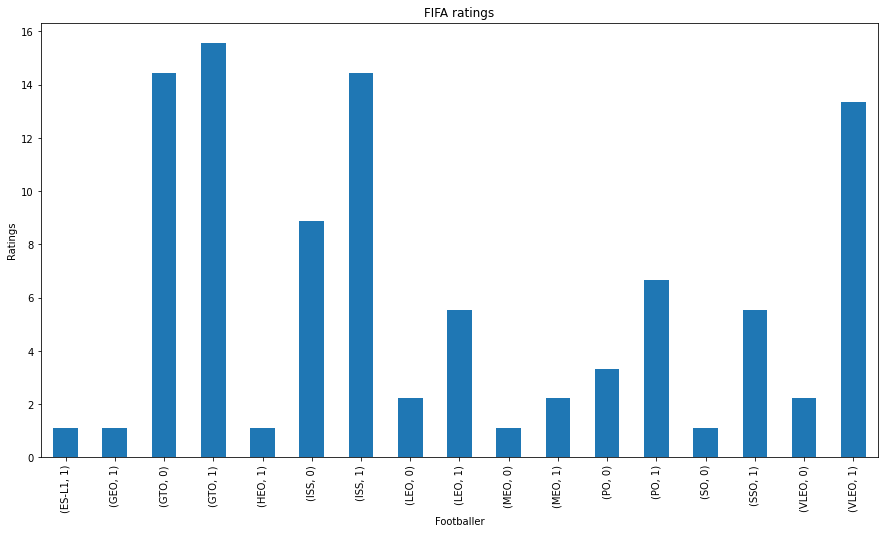

In [37]:
y.plot(kind="bar",figsize=(15, 8))

plt.title("FIFA ratings")

plt.xlabel("Footballer")

plt.ylabel("Ratings")

## Visualize the relationship between FlightNumber and Orbit type


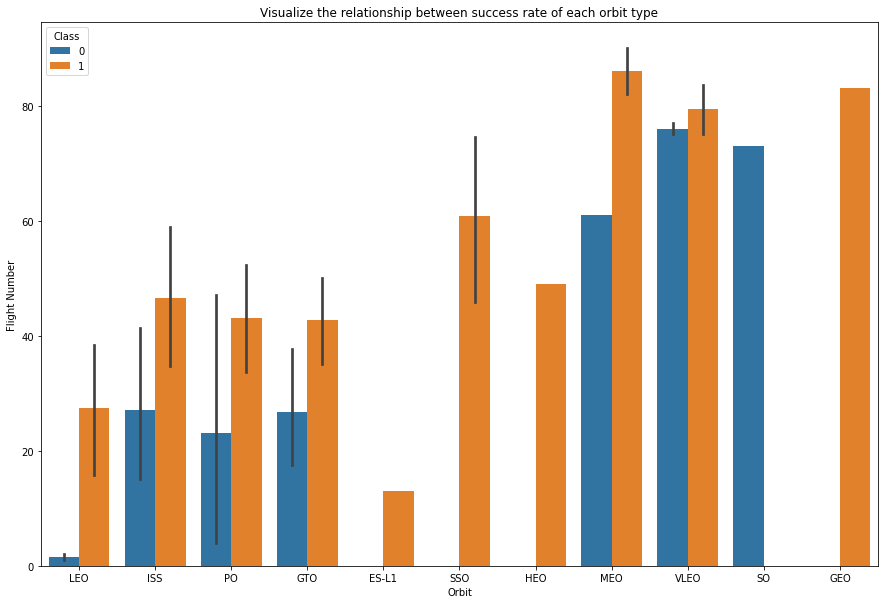

In [38]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Orbit", y="FlightNumber", hue="Class", data=df)
plt.xlabel("Orbit")
plt.ylabel("Flight Number")
plt.title("Visualize the relationship between success rate of each orbit type")
plt.show()

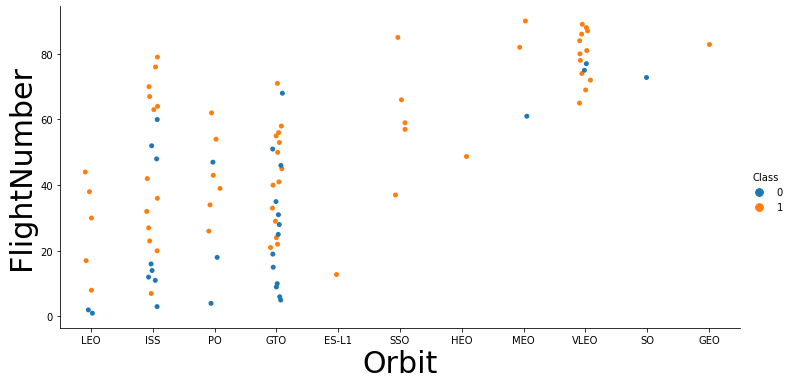

In [39]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(x="Orbit", y="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Orbit",fontsize=30)
plt.ylabel("FlightNumber",fontsize=30)
plt.show()

## Visualize the relationship between Payload and Orbit type

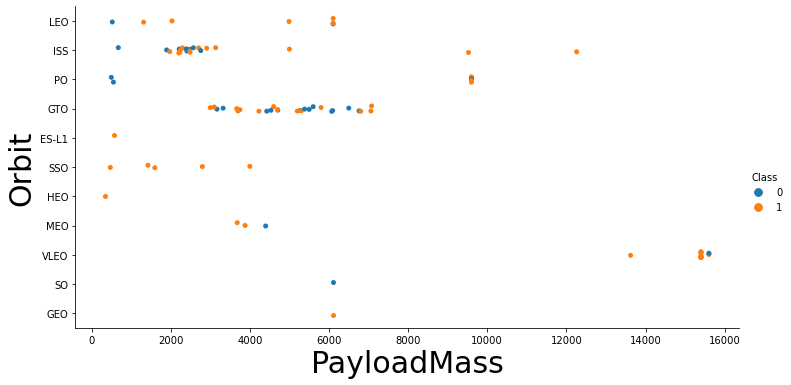

In [40]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect = 2)
plt.xlabel("PayloadMass",fontsize=30)
plt.ylabel("Orbit",fontsize=30)
plt.show()

### TASK  6: Visualize the launch success yearly trend


In [41]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [42]:
ex = Extract_year(df['Date'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

<AxesSubplot:xlabel='Date'>

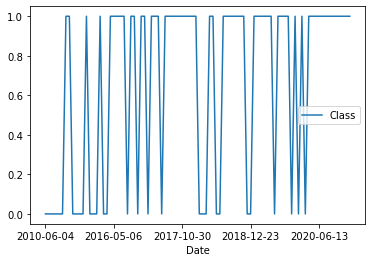

In [44]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df.plot(kind='line', y='Class' , x="Date" )

## Features Engineering


In [45]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(10)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004
5,6,3325.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1005
6,7,2296.000000,ISS,CCAFS SLC 40,1,False,False,True,NaN,1.0,0,B1006
7,8,1316.000000,LEO,CCAFS SLC 40,1,False,False,True,NaN,1.0,0,B1007
8,9,4535.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1008
9,10,4428.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1011


In [46]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [47]:
features.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556
std,26.124701,4694.671720,1.213172,1.595288,1.710254
min,1.000000,350.000000,1.000000,1.000000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000


In [48]:
# features[['LandingPad']]

## One-Hot Encoding

One Hot Encoding is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms

we need a way to convert categorical data into a numerical form and our machine learning algorithm can take in that as input. The most widely used encoding techniques are:
1.Integer Encoding: encodes the values as integer.
2.One-Hot Encoding: encodes the values as a binary vector array.
3.Dummy Variable Encoding: same as One-Hot Encoding, but one less column.

In [50]:
# features_one_hot = 

In [51]:
df.PayloadMass

0      6104.959412
1       525.000000
2       677.000000
3       500.000000
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [52]:
df_dummies = pd.get_dummies(df, columns=['Orbit'])
df_dummies.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
0,1,2010-06-04,Falcon 9,6104.959412,CCAFS SLC 40,None None,1,False,False,False,...,0,0,0,0,1,0,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,CCAFS SLC 40,None None,1,False,False,False,...,0,0,0,0,1,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,CCAFS SLC 40,None None,1,False,False,False,...,0,0,0,1,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,VAFB SLC 4E,False Ocean,1,False,False,False,...,0,0,0,0,0,0,1,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,CCAFS SLC 40,None None,1,False,False,False,...,0,1,0,0,0,0,0,0,0,0


In [53]:
dff_dummies = pd.get_dummies(df, columns=['Orbit','LaunchSite', 'LandingPad','Serial'])
dff_dummies.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
 dff_dummies.columns.values

array(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Outcome',
       'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount',
       'Longitude', 'Latitude', 'Class', 'Orbit_ES-L1', 'Orbit_GEO',
       'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO',
       'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003',
       'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004',
       'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008',
       'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013',
       'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018',
       'Serial_B1019', 'Serial_B1020', 

# Interactive Visual Analytics with Folium

### Interactive Data Visualization  Dashboarding

This lab contains the following tasks:

*   **OBJTIVE 1:** Mark all launch sites on a map
*   **OBJTIVE 2:** Mark the success/failed launches for each site on the map
*   **OBJTIVE 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


In [55]:
# !pip3 install folium
# !pip3 install wget

In [56]:
import folium
import wget

# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

# Marking all launch sites on a map

1.First, let's try to add each site's location on a map using site's latitude and longitude coordinates
2.The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [65]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

100% [................................................................................] 8966 / 8966

In [69]:
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Success,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),Success,No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt,0,28.562302,-80.577356


In [70]:
spacex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      56 non-null     int64  
 1   Date               56 non-null     object 
 2   Time (UTC)         56 non-null     object 
 3   Booster Version    56 non-null     object 
 4   Launch Site        56 non-null     object 
 5   Payload            56 non-null     object 
 6   Payload Mass (kg)  56 non-null     float64
 7   Orbit              56 non-null     object 
 8   Customer           56 non-null     object 
 9   Mission Outcome    56 non-null     object 
 10  Landing Outcome    56 non-null     object 
 11  class              56 non-null     int64  
 12  Lat                56 non-null     float64
 13  Long               56 non-null     float64
dtypes: float64(3), int64(2), object(9)
memory usage: 6.2+ KB


In [134]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df_features = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
spacex_df_features.head(8)

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS LC-40,28.562302,-80.577356,0
2,CCAFS LC-40,28.562302,-80.577356,0
3,CCAFS LC-40,28.562302,-80.577356,0
4,CCAFS LC-40,28.562302,-80.577356,0
5,CCAFS LC-40,28.562302,-80.577356,0
6,CCAFS LC-40,28.562302,-80.577356,0
7,CCAFS LC-40,28.562302,-80.577356,0


In [81]:
launch_sites_df = spacex_df_features.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [78]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [133]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

# Creating Cirle and Marker for each Launch site

*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


In [114]:
spacex_df_features.head()

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS LC-40,28.562302,-80.577356,0
2,CCAFS LC-40,28.562302,-80.577356,0
3,CCAFS LC-40,28.562302,-80.577356,0
4,CCAFS LC-40,28.562302,-80.577356,0


In [85]:
spacex_df_features['Launch Site'].value_counts()

CCAFS LC-40     26
KSC LC-39A      13
VAFB SLC-4E     10
CCAFS SLC-40     7
Name: Launch Site, dtype: int64

In [103]:
launch_site_cordibates = spacex_df_features[['Lat', 'Long']]
launch_site_cordibates.head()

,Lat,Long
0,28.562302,-80.577356
1,28.562302,-80.577356
2,28.562302,-80.577356
3,28.562302,-80.577356
4,28.562302,-80.577356


In [109]:
# for Lat, Long, in zip(spacex_df_features.Lat, spacex_df_features.Long):
#     print (Lat, Long)

In [154]:
# Initial the map
site_map_each = folium.Map(location=nasa_coordinate, zoom_start=5)

# add marker one by one on the map
for i in range(0,len(spacex_df_features)):
    circle_each = folium.Circle(
    location=[spacex_df_features.iloc[i]['Lat'], spacex_df_features.iloc[i]['Long']],
    opup=spacex_df_features.iloc[i]['Launch Site'],
    radius=1000, color='#d35400',fill_opacity=0.5
   ).add_child(folium.Popup(spacex_df_features.iloc[i]['Launch Site'])).add_to(site_map_each)
    
    marker_each = folium.Marker(
      location=[spacex_df_features.iloc[i]['Lat'], spacex_df_features.iloc[i]['Long']],
      popup=spacex_df_features.iloc[i]['Launch Site'],
      icon=folium.DivIcon(icon_size=(50,50),
                        icon_anchor=(0,0),
                          html=f"""<div style="font-family: courier new; color: blue">{spacex_df_features.iloc[i]['Launch Site']}</div>""")
   ).add_to(site_map_each)
    
site_map_each.add_child(circle_each)
site_map_each.add_child(marker_each)

In [118]:
spacex_df_features['Launch Site'].value_counts()

CCAFS LC-40     26
KSC LC-39A      13
VAFB SLC-4E     10
CCAFS SLC-40     7
Name: Launch Site, dtype: int64

Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [135]:
spacex_df_features.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Let's first create a `MarkerCluster` object


In [147]:
marker_cluster = folium.MarkerCluster().add_to(spacex_df_features)

*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [ ]:
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red

In [138]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df_features['marker_color'] = spacex_df_features['class'].apply(assign_marker_color)
spacex_df_features.tail(10)

<ipython-input-138-c6e757367a50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_df_features['marker_color'] = spacex_df_features['class'].apply(assign_marker_color)


,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [156]:
# Add marker_cluster to current site_map
site_map_each.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for i in range(0,len(spacex_df_features)):

    # TODO: Create and add a Marker cluster to the site map
      marker_each = folium.Marker(
      location=[spacex_df_features.iloc[i]['Lat'], spacex_df_features.iloc[i]['Long']],
      popup=spacex_df_features.iloc[i]['Launch Site'],
      icon=folium.DivIcon(icon_size=(50,50),
                        icon_anchor=(0,0),
                          html=f"""<div style="font-family: courier new; color: blue">{spacex_df_features.iloc[i]['Launch Site']}</div>""")
   ).add_to(site_map_each)
        
    marker_cluster.add_child(marker)

site_map_each

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)